In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from csim.simulation import Simulator
from csim.entities import Spacecraft
from csim.world import MU_EARTH, R_EARTH

In [2]:
r = R_EARTH + 1450e3

v = np.sqrt(MU_EARTH/r)
print(r)
print(v)

7828137.63
7135.750581409817


In [3]:
dt = 1
t0 = 0
n_steps = 1000
i = 98 * np.pi/180
state0 = np.array([
    r,0,0,# r*np.cos(i),0,r*np.sin(i), 
    0,v,0, 
    1,0,0,0, 
    0,0,0])

sc = Spacecraft(100, None)
sim = Simulator(state0, t0, dt, n_steps, sc)

sim.simulate()


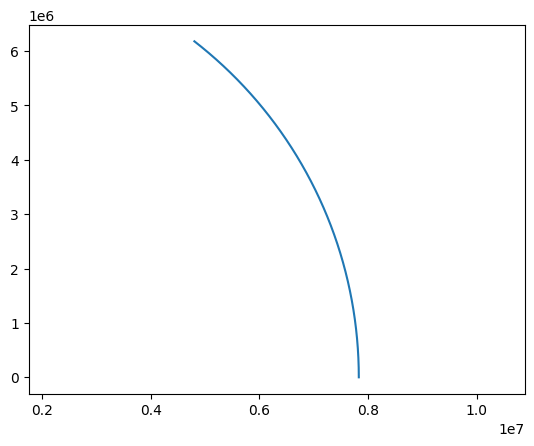

In [4]:
n = -1
plt.plot(sim.X[:n,0], sim.X[:n,1])
plt.axis('equal')
plt.xlim()
plt.show()

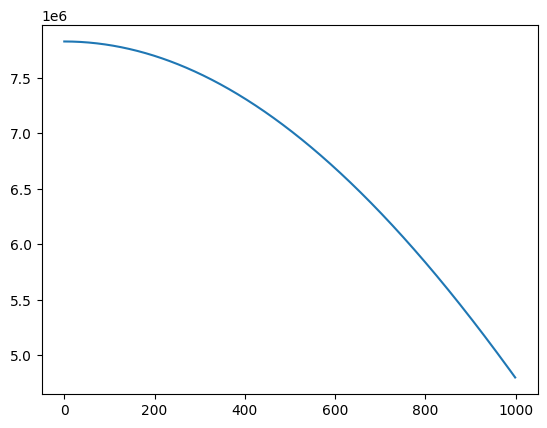

In [5]:
plt.plot(sim.X[:,0])

In [6]:
def makesphere(x, y, z, radius, resolution=10):
    """Return the coordinates for plotting a sphere centered at (x,y,z)"""
    u, v = np.mgrid[0:2*np.pi:resolution*2j, 0:np.pi:resolution*1j]
    X = radius * np.cos(u)*np.sin(v) + x
    Y = radius * np.sin(u)*np.sin(v) + y
    Z = radius * np.cos(v) + z
    return (X, Y, Z)

In [7]:
def plot_orbit(X: np.ndarray):
    # plot orbits 
    fig = go.Figure()

    # Plot trajectory
    fig.add_scatter3d(
        x=X[:,0],
        y=X[:,1],
        z=X[:,2],
        mode="markers",
        marker=dict(
            size=1,
            color="blue"
        ),
        name="Trajectory"
    )

    # Final Position
    fig.add_scatter3d(
        x=[X[-1,0]],
        y=[X[-1,1]],
        z=[X[-1,2]],
        mode="markers",
        marker=dict(
            size=10,
            color="green"
        ),
        name="Final Position"
    )


    # Initial Position
    fig.add_scatter3d(
        x=[X[0,0]],
        y=[X[0,1]],
        z=[X[0,2]],
        mode="markers",
        marker=dict(
            size=10,
            color="red",
        ),
        name="Initial Position"
    )

    # Earth!
    X, Y, Z = makesphere(0, 0, 0, R_EARTH)
    fig.add_surface(x=X, y=Y, z=Z, colorscale=[[0, "blue"], [1,"blue"]],showlegend=False, showscale=False, name="Earth")


    fig.update_layout(width=1000, height=800, 
                    title_font=dict(size=24, family='Garamond'), title_text="Satellite Trajectory", title_x=0.5, title_y=0.9)
    fig.show()

In [8]:
plot_orbit(sim.X)

In [57]:
dt = .01
t0 = 0
n_steps = 5000

r = R_EARTH
state0 = np.array([
    0, 0, R_EARTH,
    2,0,300, 
    1,0,0,0, 
    0,0,0])

sc = Spacecraft(100, None)
sim2 = Simulator(state0, t0, dt, n_steps, sc)

sim2.simulate()

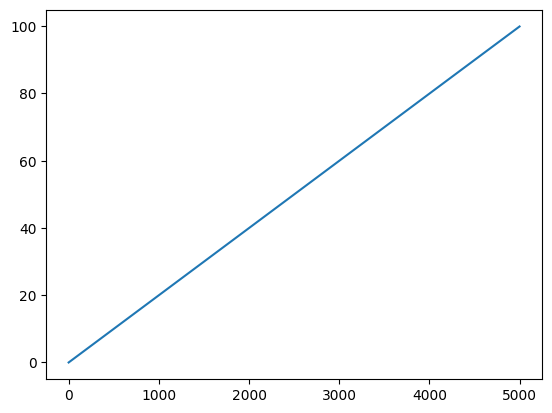

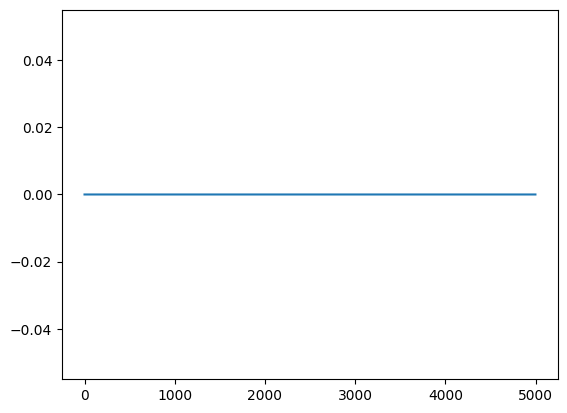

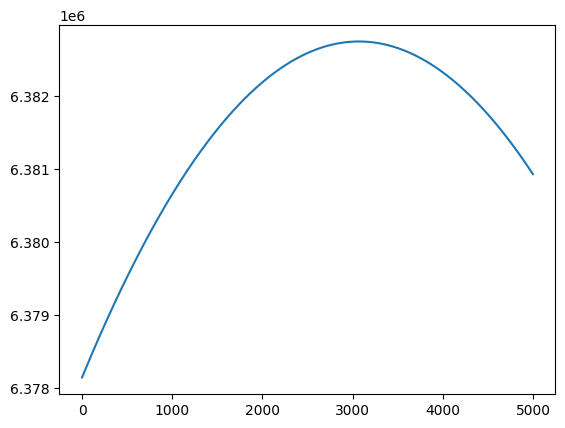

In [58]:
plt.plot(sim2.X[:,0])
plt.show()
plt.plot(sim2.X[:,1])
plt.show()
plt.plot(sim2.X[:,2])
plt.show()

In [59]:
plot_orbit(sim2.X)

In [60]:

# plot orbits 
fig = go.Figure()

# Plot trajectory
fig.add_scatter3d(
    x=sim2.X[:,0],
    y=sim2.X[:,1],
    z=sim2.X[:,2],
    mode="markers",
    marker=dict(
        size=1,
        color="blue"
    ),
    name="Trajectory"
)

# Final Position
fig.add_scatter3d(
    x=[sim2.X[-1,0]],
    y=[sim2.X[-1,1]],
    z=[sim2.X[-1,2]],
    mode="markers",
    marker=dict(
        size=10,
        color="green"
    ),
    name="Final Position"
)


# Initial Position
fig.add_scatter3d(
    x=[sim2.X[0,0]],
    y=[sim2.X[0,1]],
    z=[sim2.X[0,2]],
    mode="markers",
    marker=dict(
        size=10,
        color="red",
    ),
    name="Initial Position"
)

# Earth!
# X, Y, Z = makesphere(0, 0, 0, R_EARTH)
# fig.add_surface(x=X, y=Y, z=Z, colorscale=[[0, "blue"], [1,"blue"]],showlegend=False, showscale=False, name="Earth")


fig.update_layout(width=1000, height=800, 
                title_font=dict(size=24, family='Garamond'), title_text="Satellite Trajectory", title_x=0.5, title_y=0.9)
fig.show()

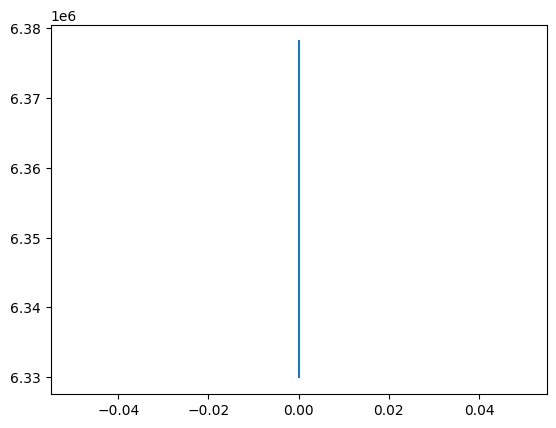

In [12]:
plt.plot(sim2.X[:,0], sim2.X[:,1])
plt.xlim()
plt.show()